**Алексеев Константин, БД-231м**

**Лабораторная работа 2**

# Парсинг HTML. XPath+Selenium

**Источник:**'https://www.insurancejournal.com/top-100-insurance-agencies/

**Цель работы:** освоение техники парсинга HTML-страниц с помощью
библиотеки BeautifulSoup в языке программирования Python для сбора, консолидации и
аналитической обработки информации.

1. Импорт необходимых библиотек

In [29]:
import requests
from lxml import html
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

2. Отправка GET-запроса к целевому URL



In [2]:
url = 'https://www.insurancejournal.com/top-100-insurance-agencies/'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
response = requests.get(url, headers=headers)
if response.status_code == 200:
 page_content = response.content
else:
 print(f"Ошибка при получении страницы: {response.status_code}")
 exit()

3. Парсинг HTML-страницы с использованием lxml:

In [14]:
tree = html.fromstring(page_content)
tree

<Element html at 0x78b5f6c2c5e0>

4. Использование XPath для извлечения данных

In [15]:
agency_items = tree.xpath('//div[@class="rankings-agency-list-item"]')

ranks = []
agency_names = []
pc_revenues = []
other_revenues = []
offices = []

# Проходим по каждому агентству и извлекаем его данные
for item in agency_items:
    # Извлечение ранга
    rank = item.xpath('.//div[@class="agency-rank"]/text()')
    ranks.append(rank[0].strip() if rank else None)

    # Извлечение названия агентства
    name = item.xpath('.//h3[@class="agency-name"]/text()')
    agency_names.append(name[0].strip() if name else None)

    # Извлечение P/C Revenue
    pc_revenue = item.xpath('.//p[@class="agency-meta-item agency-revenue"]/text()[normalize-space()]')
    pc_revenues.append(pc_revenue[0].strip() if pc_revenue else None)

    # Извлечение Other Revenue
    other_revenue = item.xpath('.//p[@class="agency-meta-item agency-other-revenue"]/text()[normalize-space()]')
    other_revenues.append(other_revenue[0].strip() if other_revenue else None)

    # Извлечение офиса
    office = item.xpath('.//p[@class="agency-meta-item agency-office"]/text()[normalize-space()]')
    offices.append(office[0].strip() if office else None)


5. Cоздание DataFrame

In [18]:
# Создание DataFrame
data = {
    'Rank': ranks,
    'Agency Name': agency_names,
    'P/C Revenue': pc_revenues,
    'Other Revenue': other_revenues,
    'Office': offices
}

df = pd.DataFrame(data)
df

,Rank,Agency Name,P/C Revenue,Other Revenue,Office
0,1,Alliant Insurance Services/Confie,"$2,791,081,357","$1,127,643,532","Irvine, California"
1,2,Acrisure LLC,"$2,731,289,283","$305,608,697","Grand Rapids, Michigan"
2,3,HUB International Ltd.,"$2,602,873,000","$1,701,966,000","Chicago, Illinois"
3,4,Lockton,"$2,143,306,000","$625,054,000","Kansas City, Missouri"
4,5,AssuredPartners,"$1,813,550,941","$859,893,000","Orlando, Florida"
...,...,...,...,...,...
95,96,Beehive Insurance Agency Inc.,"$17,628,364","$5,202,740","Salt Lake City, Utah"
96,97,Dean & Draper Insurance Agency LP,"$17,196,037","$3,021,966","Houston, Texas"
97,98,Morris & Garritano,"$16,149,992","$13,223,179","San Luis Obispo, California"
98,99,Ori-gen Insurance Group,"$15,303,945","$3,837,922","Cypress, California"


6. Предобработка данных. Преобразуем строковые значения в числовые для возможности
проведения математических операций.

In [19]:
df['P/C Revenue'] = df['P/C Revenue'].str.replace('$', '')
df['Other Revenue'] = df['Other Revenue'].str.replace('$', '')
df['P/C Revenue'] = df['P/C Revenue'].str.replace(',', '')
df['Other Revenue'] = df['Other Revenue'].str.replace(',', '')
df['P/C Revenue'] = pd.to_numeric(df['P/C Revenue'], errors='coerce')
df['Other Revenue'] = pd.to_numeric(df['Other Revenue'], errors='coerce')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           100 non-null    object 
 1   Agency Name    100 non-null    object 
 2   P/C Revenue    100 non-null    int64  
 3   Other Revenue  92 non-null     float64
 4   Office         100 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 4.0+ KB


In [21]:
df.head(5)

,Rank,Agency Name,P/C Revenue,Other Revenue,Office
0,1,Alliant Insurance Services/Confie,2791081357,1.127644e+09,"Irvine, California"
1,2,Acrisure LLC,2731289283,3.056087e+08,"Grand Rapids, Michigan"
2,3,HUB International Ltd.,2602873000,1.701966e+09,"Chicago, Illinois"
3,4,Lockton,2143306000,6.250540e+08,"Kansas City, Missouri"
4,5,AssuredPartners,1813550941,8.598930e+08,"Orlando, Florida"


6. Анализ данных

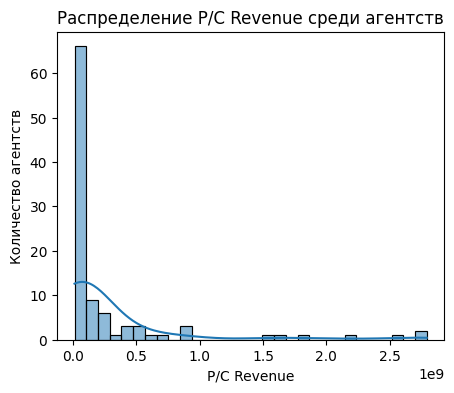

In [24]:
plt.figure(figsize=(5, 4))
sns.histplot(df['P/C Revenue'], kde=True, bins=30)
plt.title('Распределение P/C Revenue среди агентств')
plt.xlabel('P/C Revenue')
plt.ylabel('Количество агентств')
plt.show()

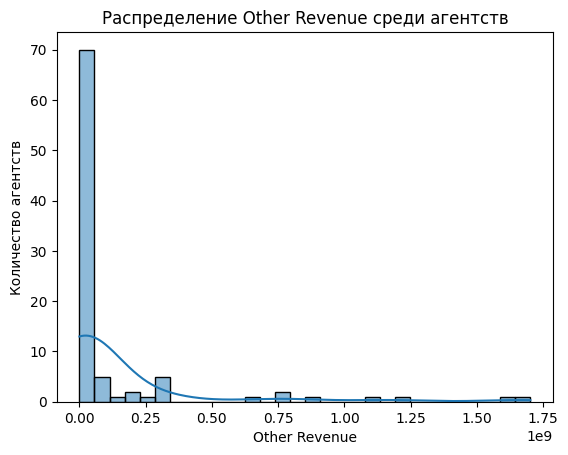

In [25]:
sns.histplot(df['Other Revenue'].dropna(), kde=True, bins=30)
plt.title('Распределение Other Revenue среди агентств')
plt.xlabel('Other Revenue')
plt.ylabel('Количество агентств')
plt.show()

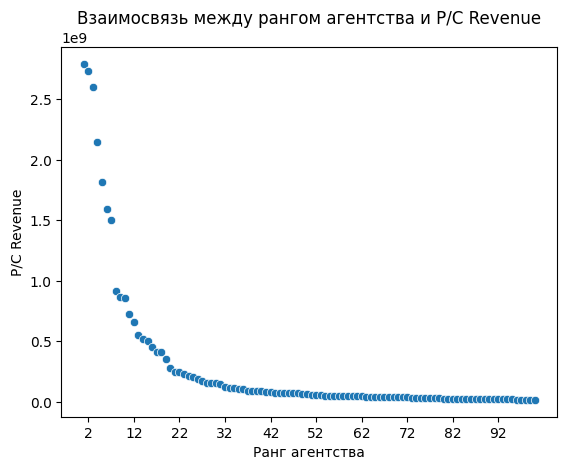

In [30]:
sns.scatterplot(x='Rank', y='P/C Revenue', data=df)
plt.title('Взаимосвязь между рангом агентства и P/C Revenue')
plt.xlabel('Ранг агентства')
plt.ylabel('P/C Revenue')
plt.xticks(ticks=np.arange(1, 101, step=10))
plt.show()

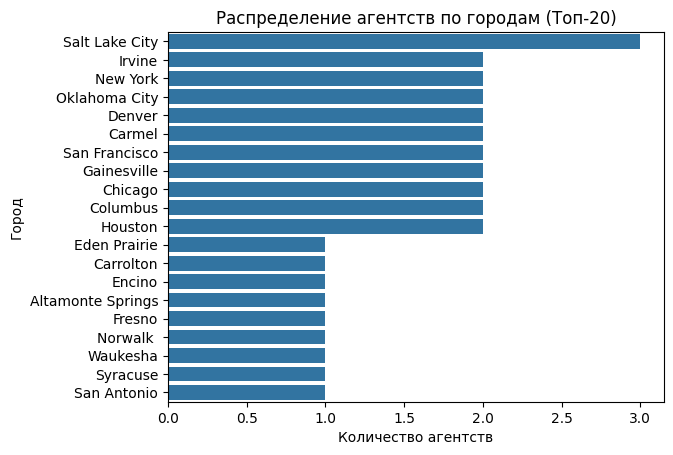

In [27]:
# Извлечем города из информации об офисах
df['City'] = df['Office'].apply(lambda x: x.split(',')[0])

# Построим график распределения агентств по городам
city_counts = df['City'].value_counts().head(20)
sns.barplot(x=city_counts.values, y=city_counts.index)
plt.title('Распределение агентств по городам (Топ-20)')
plt.xlabel('Количество агентств')
plt.ylabel('Город')
plt.show()


**Вывод:** Доходы агентств сильно варьируются. Большая имеет относительно невысокие доходы, но есть несколько лидеров с очень высокими показателями P/C Revenue. Это указывает на наличие значительной концентрации доходов у топовых компаний.

Самые топовые компании расположены в Солт-лейк-сити (штат Юта США), Ирвайн (Калифорния США), Нью-Йорк